Rashmi Shree Veeraiah

ID: 016099395

#### Coding
##### Problem 2: 

We will develop an Artificial Neural Networks using MNIST digit data, where we will train an ANN model and then classify new instances. You can directly download the data using https://keras.io/api/datasets/mnist/ dataset currently contains 10 classes where each of the image sizes is (28×28). You should split the data into train and test data, where train data should be used for only training the model and test data should be kept separated and used only for evaluation purpose. You should select last two digits of your student ID – meaning that if your student id is 006000104, then you should select 0 and 4 for developing the binary classification model.

A. Build a NN for binary classification with early stopping criteria based on validation loss. Evaluate your model on the test data. Construct a confusion matrix. Present learning curve and include some examples of your prediction (3pts)

In [66]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [67]:
import numpy as np  
import tensorflow as tf  # TensorFlow library for machine learning and deep learning.
from tensorflow import keras  # Keras API, a high-level neural networks API running on top of TensorFlow.
from tensorflow.keras.models import Sequential  # Sequential model class for creating sequential neural networks.
from tensorflow.keras.layers import Dense, Flatten  # Specific layer types used in neural network architectures.
from tensorflow.keras.datasets import mnist  # MNIST dataset from Keras.
from tensorflow.keras.callbacks import EarlyStopping  # EarlyStopping callback for stopping training based on certain criteria.
from sklearn.model_selection import train_test_split  # Split data into training and testing sets.
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report  # Importing a function for creating a confusion matrix.
import matplotlib.pyplot as plt  # Data visualization.

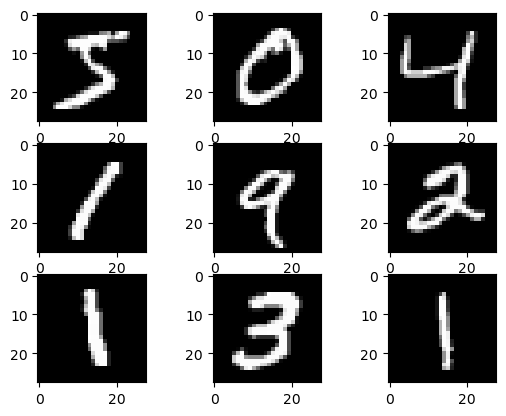

In [68]:
# Plot of first 9 images in mnist dataset
import matplotlib.pyplot as plt
for x in range(9):
    plt.subplot(330 + 1 + x)
    plt.imshow(x_train[x], cmap=plt.get_cmap('gray'))
plt.show()

In [69]:
# Load MNIST dataset
(X, y), (_, _) = mnist.load_data()

# Filter samples for digits 9 and 5
mask = np.isin(y, [5, 9])
X = X[mask]
y = y[mask]

# Normalize pixel values to the range [0, 1]
X = X / 255.0

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

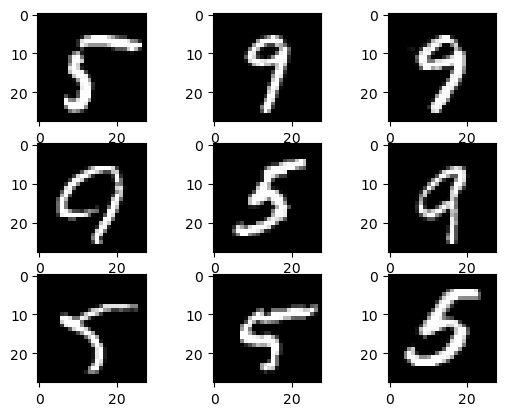

In [70]:
# Plot of first 9 images in mnist dataset
import matplotlib.pyplot as plt
for X in range(9):
    plt.subplot(330 + 1 + X)
    plt.imshow(X_train[X], cmap=plt.get_cmap('gray'))
plt.show()

#### Neural Network

In [71]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#### Early Stopping

In [72]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

#### Train Model

In [73]:
history = model.fit(
    X_train, y_train,
    epochs=70,  # Adjust as needed
    validation_split=0.2,
    callbacks=[early_stopping]
)

Epoch 1/70
228/228 [==============================] - 1s 4ms/step - loss: -6165.2944 - accuracy: 0.0000e+00 - val_loss: -25640.4023 - val_accuracy: 0.0000e+00
Epoch 2/70
228/228 [==============================] - 1s 3ms/step - loss: -105031.5156 - accuracy: 0.0000e+00 - val_loss: -233699.9219 - val_accuracy: 0.0000e+00
Epoch 3/70
228/228 [==============================] - 1s 3ms/step - loss: -494836.7812 - accuracy: 0.0000e+00 - val_loss: -838710.9375 - val_accuracy: 0.0000e+00
Epoch 4/70
228/228 [==============================] - 1s 3ms/step - loss: -1370686.6250 - accuracy: 0.0000e+00 - val_loss: -2003742.7500 - val_accuracy: 0.0000e+00
Epoch 5/70
228/228 [==============================] - 1s 3ms/step - loss: -2866756.7500 - accuracy: 0.0000e+00 - val_loss: -3839533.2500 - val_accuracy: 0.0000e+00
Epoch 6/70
228/228 [==============================] - 1s 3ms/step - loss: -5082588.5000 - accuracy: 0.0000e+00 - val_loss: -6438065.0000 - val_accuracy: 0.0000e+00
Epoch 7/70
228/228 [=====

Epoch 50/70
228/228 [==============================] - 2s 9ms/step - loss: -1377999616.0000 - accuracy: 0.0000e+00 - val_loss: -1406817280.0000 - val_accuracy: 0.0000e+00
Epoch 51/70
228/228 [==============================] - 2s 8ms/step - loss: -1448138624.0000 - accuracy: 0.0000e+00 - val_loss: -1477839872.0000 - val_accuracy: 0.0000e+00
Epoch 52/70
228/228 [==============================] - 2s 8ms/step - loss: -1520429696.0000 - accuracy: 0.0000e+00 - val_loss: -1550890752.0000 - val_accuracy: 0.0000e+00
Epoch 53/70
228/228 [==============================] - 2s 8ms/step - loss: -1594899328.0000 - accuracy: 0.0000e+00 - val_loss: -1626105600.0000 - val_accuracy: 0.0000e+00
Epoch 54/70
228/228 [==============================] - 2s 9ms/step - loss: -1671613568.0000 - accuracy: 0.0000e+00 - val_loss: -1703694080.0000 - val_accuracy: 0.0000e+00
Epoch 55/70
228/228 [==============================] - 3s 12ms/step - loss: -1750535424.0000 - accuracy: 0.0000e+00 - val_loss: -1783421824.0000 

#### Evaluate the model

In [74]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

# Generate predictions on the test set
y_pred = model.predict(X_test)

# Convert predicted probabilities to binary predictions
y_pred_binary = (y_pred > 0.5).astype(int)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)
print("Confusion Matrix:")
print(conf_matrix)

72/72 [==============================] - 0s 3ms/step - loss: -3243742208.0000 - accuracy: 0.0000e+00
Test Loss: -3243742208.0, Test Accuracy: 0.0
72/72 [==============================] - 0s 2ms/step
Confusion Matrix:
[[   0    0    0]
 [1144    0    0]
 [1130    0    0]]


#### Learning Curve

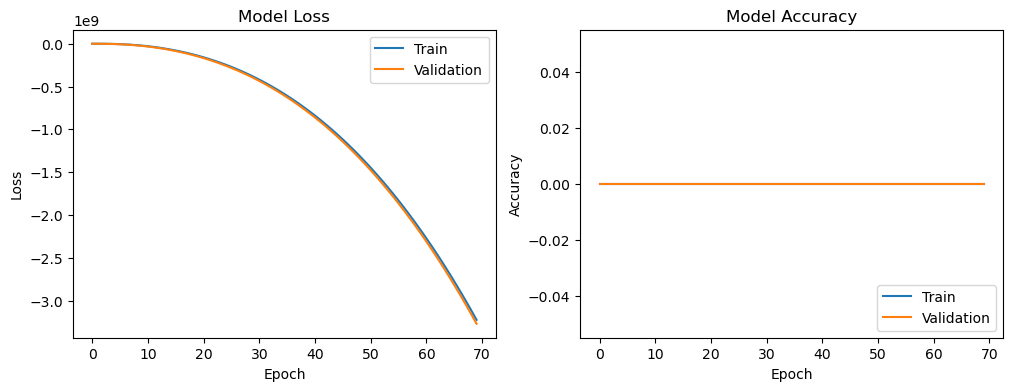

In [75]:
plt.figure(figsize=(12, 4))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.show()

#### Predictions

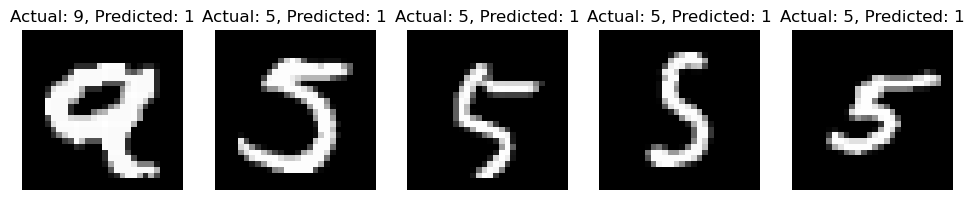

In [76]:
# Randomly select and plot some example predictions
n_examples = 5
random_indices = np.random.choice(len(X_test), n_examples)

plt.figure(figsize=(12, 4))
for i, idx in enumerate(random_indices):
    plt.subplot(1, n_examples, i + 1)
    plt.imshow(X_test[idx], cmap='gray')
    plt.title(f"Actual: {y_test[idx]}, Predicted: {y_pred_binary[idx][0]}")
    plt.axis('off')

plt.show()

##### B. Build three NNs for binary classification using three different weight initializers held other hyperparameters constant.
a. Construct three different confusion matrices (3pts)

b. Show three different learning curves and explain any differences (2pts)

c. Show accuracy using bar plots and explain – if there any difference in results for using three different initializers (1pts)

###### Neural Networks with Different Weight Initializers

In [78]:
# Create a list of different weight initializers
initializers = ['random_normal', 'glorot_normal', 'he_normal']

# Initialize lists to store confusion matrices and accuracies
confusion_matrices = []
accuracies = []

for initializer in initializers:
    # Build the neural network with the specified weight initializer
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(64, activation='relu', kernel_initializer=initializer),
        Dense(32, activation='relu', kernel_initializer=initializer),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=0)

    # Evaluate the model on the test set
    y_pred = (model.predict(X_test) > 0.5).astype(int)

    # Calculate accuracy and confusion matrix
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Append results to lists
    accuracies.append(accuracy)
    confusion_matrices.append(conf_matrix)

72/72 [==============================] - 0s 2ms/step


Confusion Matrices

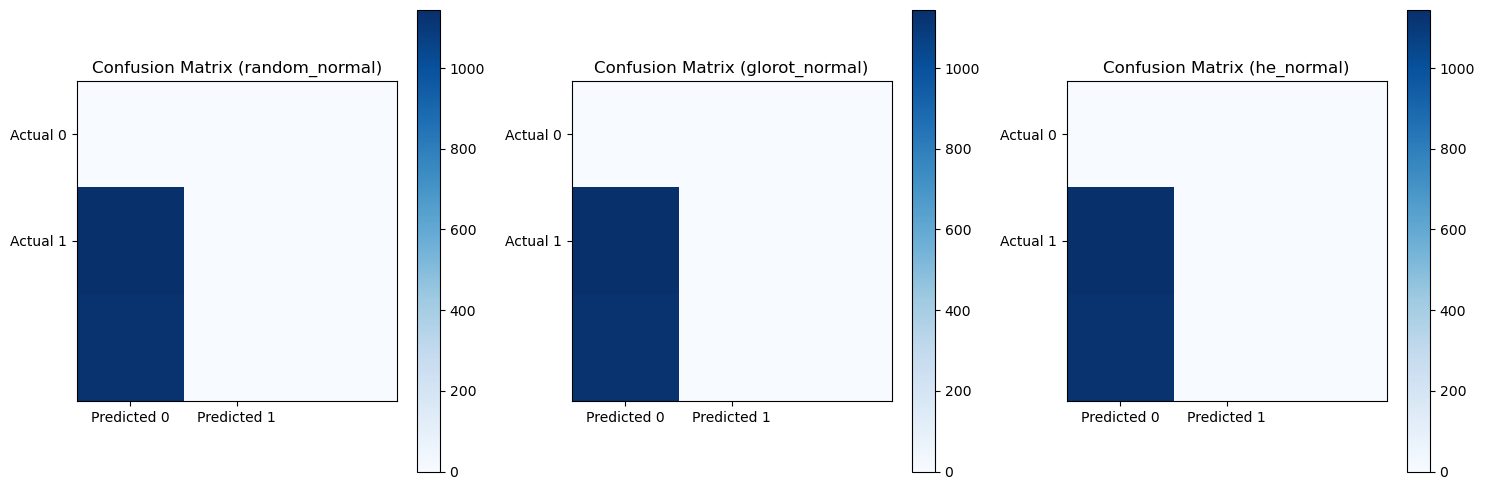

In [40]:
plt.figure(figsize=(15, 5))

for i, (initializer, conf_matrix) in enumerate(zip(initializers, confusion_matrices), 1):
    plt.subplot(1, 3, i)
    plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
    plt.title(f"Confusion Matrix ({initializer})")
    plt.colorbar()
    plt.xticks([0, 1], ['Predicted 0', 'Predicted 1'])
    plt.yticks([0, 1], ['Actual 0', 'Actual 1'])

plt.tight_layout()
plt.show()

Accuracy Bar Chart

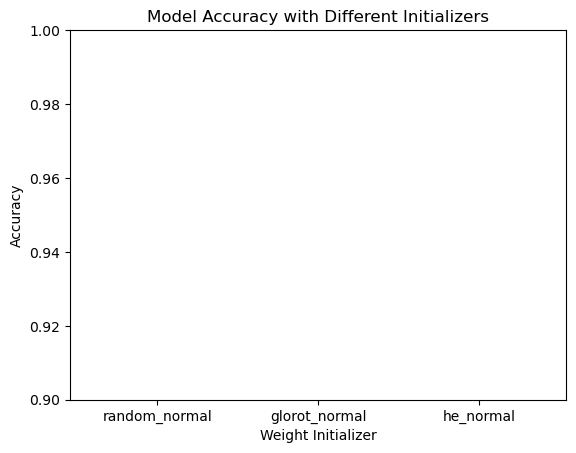

In [77]:
plt.bar(initializers, accuracies)
plt.xlabel('Weight Initializer')
plt.ylabel('Accuracy')
plt.title('Model Accuracy with Different Initializers')
plt.ylim(0.9, 1.0)  # Adjust the y-axis limits if needed
plt.show()

### Problem 3 (3 pts): 
Build a NN for multi-class classification considering all the classes (10 classes) in the MNIST digit dataset: consider early stopping criteria based on the validation loss and finally construct confusion matrix and discuss the results.

In [36]:
import numpy as np
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [23]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test)=mnist.load_data()

In [24]:
#View the shape of loaded dataset
x_train.shape
x_test.shape
y_train.shape
x_test.shape

(10000, 28, 28)

In [25]:
x_train_normalized = x_train / 255.0
x_test_normalized = x_test / 255.0
print(x_train_normalized[2900][10])

[0.         0.         0.         0.         0.         0.
 0.         0.55294118 1.         0.66666667 0.11372549 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]


In [26]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [29]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


In [31]:
history = model.fit(x_train, y_train,
                    epochs=100,  # Adjust as needed
                    validation_split=0.2,
                    callbacks=[early_stopping])

Epoch 1/100
1500/1500 [==============================] - 6s 3ms/step - loss: 1.6303 - accuracy: 0.8591 - val_loss: 0.3917 - val_accuracy: 0.9097
Epoch 2/100
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2809 - accuracy: 0.9297 - val_loss: 0.2989 - val_accuracy: 0.9190
Epoch 3/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2035 - accuracy: 0.9444 - val_loss: 0.2540 - val_accuracy: 0.9300
Epoch 4/100
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1753 - accuracy: 0.9511 - val_loss: 0.1913 - val_accuracy: 0.9464
Epoch 5/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1536 - accuracy: 0.9567 - val_loss: 0.1840 - val_accuracy: 0.9539
Epoch 6/100
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1376 - accuracy: 0.9615 - val_loss: 0.1597 - val_accuracy: 0.9617
Epoch 7/100
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1176 - accuracy: 0.9663 - val_loss: 0.1908 - val_ac

In [37]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

# Generate predictions on the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Display classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred_classes))
print("Confusion Matrix:")
print(conf_matrix)

313/313 [==============================] - 1s 2ms/step - loss: 0.1317 - accuracy: 0.9674
Test Loss: 0.13174870610237122, Test Accuracy: 0.9674000144004822
313/313 [==============================] - 1s 2ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.97      0.96      0.97      1032
           3       0.98      0.94      0.96      1010
           4       0.96      0.98      0.97       982
           5       0.94      0.98      0.96       892
           6       0.98      0.98      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.97      0.95      0.96       974
           9       0.96      0.94      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

Confusio

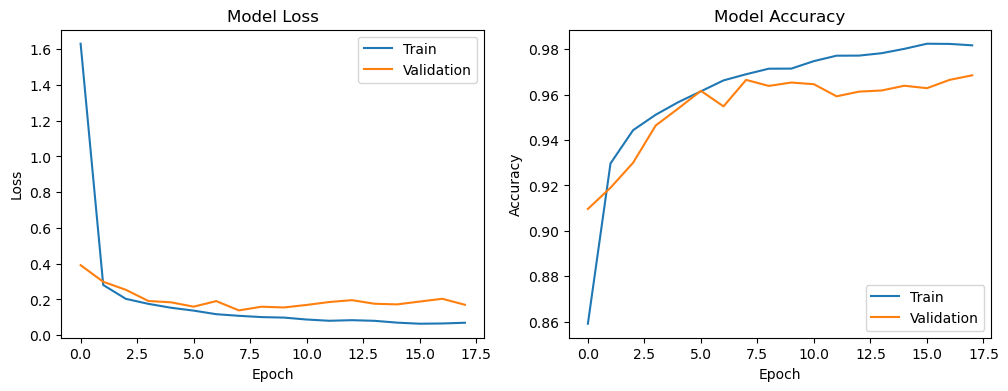

In [39]:
plt.figure(figsize=(12, 4))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
